### Group ID: 71
### Group Members Name with Student ID:
**(1) S IYNESHDURAI - 2023AA05192 - 100% Contribution**

**(2) AKBARSHA M - 2023AA05159 - 100% Contribution**

**(3) MITHUN S - 2023AB05188 - 100% Contribution**

**(4) ARUL PANDIYAN K - 2023AA05146 - 100% Contribution**


# Problem Statement

The objective of the problem is to implement an Actor-Critic reinforcement learning algorithm to optimize energy consumption in a building. The agent should learn to adjust the temperature settings dynamically to minimize energy usage while maintaining comfortable indoor conditions.

#### Dataset Details
Dataset: https://archive.ics.uci.edu/dataset/374/appliances+energy+prediction

This dataset contains energy consumption data for a residential building, along with various environmental and operational factors.

Data Dictionary:
* Appliances:       Energy use in Wh
* lights:           Energy use of light fixtures in the house in Wh
* T1 - T9:          Temperatures in various rooms and outside
* RH_1 to RH_9:     Humidity measurements in various rooms and outside
* Visibility:       Visibility in km
* Tdewpoint:       Dew point temperature
* Pressure_mm_hgg:  Pressure in mm Hg
* Windspeed:        Wind speed in m/s

#### Environment Details
**State Space:**
The state space consists of various features from the dataset that impact energy consumption and comfort levels.

* Current Temperature (T1 to T9): Temperatures in various rooms and outside.
* Current Humidity (RH_1 to RH_9): Humidity measurements in different locations.
* Visibility (Visibility): Visibility in meters.
* Dew Point (Tdewpoint): Dew point temperature.
* Pressure (Press_mm_hg): Atmospheric pressure in mm Hg.
* Windspeed (Windspeed): Wind speed in m/s.

Total State Vector Dimension: Number of features = 9 (temperature) + 9 (humidity) + 1 (visibility) + 1 (dew point) + 1 (pressure) + 1 (windspeed) = 22 features

**Target Variable:** Appliances (energy consumption in Wh).

**Action Space:**
The action space consists of discrete temperature adjustments:
* Action 0: Decrease temperature by 1°C
* Action 1: Maintain current temperature
* Action 2: Increase temperature by 1°C


- If the action is to decrease the temperature by 1°C, you'll adjust each temperature feature (T1 to T9) down by 1°C.
- If the action is to increase the temperature by 1°C, you'll adjust each temperature feature (T1 to T9) up by 1°C.
- Other features remain unchanged.

**Policy (Actor):** A neural network that outputs a probability distribution over possible temperature adjustments.

**Value function (Critic):** A neural network that estimates the expected cumulative reward (energy savings) from a given state.

**Reward function:**
The reward function should reflect the overall comfort and energy efficiency based on all temperature readings. i.e., balance between minimising temperature deviations and minimizing energy consumption.

* Calculate the penalty based on the deviation of each temperature from the target temperature and then aggregate these penalties.
* Measure the change in energy consumption before and after applying the RL action.
* Combine the comfort penalty and energy savings to get the final reward.

*Example:*

Target temperature=22°C

Initial Temperatures: T1=23, T2=22, T3=21, T4=23, T5=22, T6=21, T7=24, T8=22, T9=23

Action Taken: Decrease temperature by 1°C for each room

Resulting Temperatures: T1 = 22, T2 = 21, T3 = 20, T4 = 22, T5 = 21, T6 = 20, T7 = 23, T8 = 21, T9 = 22

Energy Consumption: 50 Wh (before RL adjustment) and 48 Wh (after RL adjustment)
* Energy Before (50 Wh): Use the energy consumption from the dataset at the current time step.
* Energy After (48 Wh): Use the energy consumption from the dataset at the next time step (if available).

Consider only temperature features for deviation calculation.

Deviation = abs (Ti− Ttarget )

Deviations=[ abs(22−22), abs(21−22), abs(20−22), abs(22−22),  abs(21−22), abs(20−22), abs(23−22), abs(21−22), abs(22−22) ]

Deviations = [0, 1, 2, 0, 1, 2, 1, 1, 0], Sum of deviations = 8

Energy Savings = Energy Before−Energy After = 50 – 48 = 2Wh

Reward= −Sum of Deviations + Energy Savings = -8+6 = -2

#### Expected Outcomes
1. Pre-process the dataset to handle any missing values and create training and testing sets.
2. Implement the Actor-Critic algorithm using TensorFlow.
3. Train the model over 500 episodes to minimize energy consumption while maintaining an indoor temperature of 22°C.
4. Plot the total reward obtained in each episode to evaluate the learning progress.
5. Evaluate the performance of the model on test set to measure its performance
6. Provide graphs showing the convergence of the Actor and Critic losses.
7. Plot the learned policy by showing the action probabilities across different state values (e.g., temperature settings).
8. Provide an analysis on a comparison of the energy consumption before and after applying the reinforcement learning algorithm.


#### Code Execution

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv" # updated URL
data = pd.read_csv(url)

# Fill missing values, if any
data.fillna(method='ffill', inplace=True)

# Define feature groups
temp_features = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']
other_features = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9',
                 'Visibility', 'Tdewpoint', 'Press_mm_hg', 'Windspeed']
target = ['Appliances']

# Extract features and target
X_temp = data[temp_features].values  # Shape: (n_samples, 9)
X_other = data[other_features].values  # Shape: (n_samples, 13)
y = data[target].values  # Shape: (n_samples, 1)

# Initialize scalers
scaler_other = StandardScaler()

# Scale only the non-temperature features
X_other_scaled = scaler_other.fit_transform(X_other)

# Concatenate temperature (unscaled) and other (scaled) features
X = np.hstack((X_temp, X_other_scaled))  # Shape: (n_samples, 22)

# No scaling for y to maintain energy consumption in original units
# If you prefer scaling y, ensure to inverse transform when calculating rewards
# For this implementation, we'll keep y unscaled

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (15788, 22)
Testing data shape: (3947, 22)


<ipython-input-9-3df30f27d945>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


#### Defining Actor Critic Model using tensorflow (1 M)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

# Define the Energy Prediction Model
def build_energy_model():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(22,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='linear')  # Predicts energy consumption
    ])
    model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='mse')
    return model

# Instantiate and train the energy model
energy_model = build_energy_model()
energy_model.summary()

# Train the energy model
energy_model.fit(
    X_train, y_train,
    epochs=50,  # Increase epochs for better training
    batch_size=64,
    validation_split=0.2,
    verbose=1
)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,585 (76.50 KB)

 Trainable params: 19,585 (76.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 12273.9570 - val_loss: 10587.6348
Epoch 2/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9780.0859 - val_loss: 10387.8682
Epoch 3/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9863.1133 - val_loss: 10066.8262
Epoch 4/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9468.0049 - val_loss: 9780.3916
Epoch 5/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9588.0049 - val_loss: 9728.1543
Epoch 6/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8812.9014 - val_loss: 9651.2461
Epoch 7/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9167.1377 - val_loss: 9523.4404
Epoch 8/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9153.8418 - val_loss: 9420.3154
Epoch 9/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9573.5596 - val_loss: 9500.3369
Epoch 10/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9007.2422 - val_loss: 9335.1748
Epoch 11/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9028.4512 - va

### Reward Function (0.5 M)

In [ ]:
def calculate_reward(state, next_state, y_current, y_next, target_temp=22):
    """
    Calculate the reward based on temperature deviations and energy savings.

    Parameters:
    - state: Current state vector (numpy array)
    - next_state: Next state vector after action (numpy array)
    - y_current: Current energy consumption (float)
    - y_next: Next energy consumption after action (float)
    - target_temp: Desired target temperature (float)

    Returns:
    - reward: Calculated reward (float)
    """
    # Calculate sum of absolute deviations for all temperature features
    temp_deviation = np.sum(np.abs(next_state[:9] - target_temp))

    # Calculate energy savings
    energy_saving = y_current - y_next  # Positive if energy decreased

    # Define reward as negative deviations plus energy savings
    reward = -temp_deviation + energy_saving

    return reward


#### Environment Simulation (0.5 M)


In [ ]:
def simulate_environment(state, action, energy_model, target_temp=22):
    """
    Simulate the environment's response to an action.

    Parameters:
    - state: Current state vector (numpy array)
    - action: Action taken (int: 0=Decrease, 1=Maintain, 2=Increase)
    - energy_model: Trained energy prediction model
    - target_temp: Desired target temperature (float)

    Returns:
    - next_state: New state vector after action (numpy array)
    - y_next: Predicted energy consumption after action (float)
    - reward: Calculated reward (float)
    """
    # Define temperature adjustments based on action
    temp_adjustment = [-1, 0, 1]  # Decrease, Maintain, Increase

    # Create a copy of the current state to modify
    next_state = state.copy()

    # Apply temperature adjustment to all temperature features (T1 to T9)
    next_state[:9] += temp_adjustment[action]

    # Predict energy consumption for the next state
    y_next = energy_model.predict(next_state.reshape(1, -1))[0][0]

    # Predict current energy consumption
    y_current = energy_model.predict(state.reshape(1, -1))[0][0]

    # Calculate reward
    reward = calculate_reward(state, next_state, y_current, y_next, target_temp=target_temp)

    return next_state, y_next, reward


In [ ]:
from tensorflow.keras import layers, models, optimizers

# Define the Actor model
def build_actor_model(state_space, action_space):
    model = models.Sequential([
        layers.InputLayer(input_shape=(state_space,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(action_space, activation='softmax')  # Outputs action probabilities
    ])
    model.compile(optimizer=optimizers.Adam(learning_rate=0.001))
    return model


In [ ]:
# Define the Critic model
def build_critic_model(state_space):
    model = models.Sequential([
        layers.InputLayer(input_shape=(state_space,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='linear')  # Outputs state-value
    ])
    model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='mse')
    return model


In [ ]:
# Define state and action spaces
state_space = X_train.shape[1]  # 22 features
action_space = 3  # 0=Decrease, 1=Maintain, 2=Increase

# Instantiate Actor and Critic models
actor_model = build_actor_model(state_space, action_space)
critic_model = build_critic_model(state_space)

# Display model summaries
actor_model.summary()
critic_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,843 (77.51 KB)

 Trainable params: 19,843 (77.51 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,585 (76.50 KB)

 Trainable params: 19,585 (76.50 KB)

 Non-trainable params: 0 (0.00 B)

#### Implementation of Training Function (2 M)

In [ ]:
import tensorflow as tf
import numpy as np

def train_actor_critic(actor_model, critic_model, energy_model, X_train, episodes=500, gamma=0.99):
    actor_losses = []
    critic_losses = []

    # Compile critic model with an optimizer
    critic_model.compile(optimizer=tf.keras.optimizers.Adam())

    for episode in range(episodes):
        total_reward = 0
        state = X_train[np.random.choice(len(X_train))]  # Random initial state

        with tf.GradientTape(persistent=True) as tape_critic, tf.GradientTape() as tape_actor:
            # Predict critic value
            critic_value = critic_model(state.reshape(1, -1))

            # Simulate an action (e.g., random action for now)
            action = np.random.choice([0, 1])  # Assuming binary action space

            # Get target value based on reward from the energy model and next state
            # Use forward pass through energy model instead of predict()
            reward = energy_model(state.reshape(1, -1), training=True)  # Forward pass to maintain gradient flow
            next_state = X_train[np.random.choice(len(X_train))]  # Simulate the next state
            next_value = critic_model(next_state.reshape(1, -1), training=True)  # Forward pass to maintain gradients

            # Compute target value: reward + gamma * next_value
            target_value = reward + gamma * next_value
            total_reward += reward

            # Compute critic loss
            # Use tf.keras.losses.MeanSquaredError() to create a loss object
            critic_loss = tf.keras.losses.MeanSquaredError()(target_value, critic_value)

            # Compute actor loss (using advantage)
            advantage = target_value - critic_value
            log_probs = actor_model(state.reshape(1, -1), training=True)  # Forward pass to maintain gradients
            actor_loss = -log_probs * advantage

        # Compute and apply gradients for the critic
        grads_critic = tape_critic.gradient(critic_loss, critic_model.trainable_variables)
        critic_model.optimizer.apply_gradients(zip(grads_critic, critic_model.trainable_variables))

        # Compute and apply gradients for the actora
        actor_optimizer = tf.keras.optimizers.Adam()  # Define an optimizer for actor
        grads_actor = tape_actor.gradient(actor_loss, actor_model.trainable_variables)
        actor_optimizer.apply_gradients(zip(grads_actor, actor_model.trainable_variables))

        # Store losses
        actor_losses.append(actor_loss.numpy())
        critic_losses.append(critic_loss.numpy())

        # Logging each episode's details
        print(f"Episode {episode+1}/{episodes}, Total Reward: {total_reward}, Actor Loss: {actor_loss.numpy()}, Critic Loss: {critic_loss.numpy()}")

    return actor_losses, critic_losses


In [ ]:

# Call training function
actor_losses, critic_losses = train_actor_critic(actor_model, critic_model, energy_model, X_train, episodes=500, gamma=0.99)


Episode 1/500, Total Reward: [[91.405]], Actor Loss: [[ -0.12714262 -88.07152     -1.7712694 ]], Critic Loss: 8094.58740234375
Episode 2/500, Total Reward: [[98.495155]], Actor Loss: [[ -6.314211 -43.78624  -49.293377]], Critic Loss: 9879.1318359375
Episode 3/500, Total Reward: [[185.08284]], Actor Loss: [[ -13.121733 -152.68196   -18.284948]], Critic Loss: 33888.625
Episode 4/500, Total Reward: [[107.9656]], Actor Loss: [[-21.557621 -61.24501  -28.057219]], Critic Loss: 12289.90625
Episode 5/500, Total Reward: [[48.528103]], Actor Loss: [[-13.425478  -22.47305   -13.0330925]], Critic Loss: 2394.30322265625
Episode 6/500, Total Reward: [[113.69542]], Actor Loss: [[-24.671078 -67.29334  -19.136793]], Critic Loss: 12343.4794921875
Episode 7/500, Total Reward: [[77.32563]], Actor Loss: [[-19.690214 -32.828503 -24.253145]], Critic Loss: 5893.91845703125
Episode 8/500, Total Reward: [[77.572685]], Actor Loss: [[-31.885958 -20.765062 -27.2844  ]], Critic Loss: 6389.6708984375
Episode 9/500, 

#### Evaluate the performance of the model on test set (0.5 M)

In [ ]:
def evaluate_model(actor_model, energy_model, X_test):
    """
    Evaluate the trained Actor-Critic model on the test set.

    Parameters:
    - actor_model: Trained Actor model
    - energy_model: Trained energy prediction model
    - X_test: Testing state features (numpy array)

    Returns:
    - total_reward: Cumulative reward over the test set (float)
    """
    total_reward = 0

    for state in X_test:
        # Get action probabilities from the Actor
        action_probs = actor_model.predict(state.reshape(1, -1), verbose=0)
        action = np.random.choice(action_space, p=action_probs.flatten())  # Sample action based on probabilities

        # Simulate environment: get next_state, y_next, and reward
        next_state, y_next, reward = simulate_environment(state, action, energy_model)

        # Accumulate reward
        total_reward += reward

    print(f"Total reward on the test set: {total_reward:.2f}")


In [ ]:
# Evaluate the model on the test set
evaluate_model(actor_model, energy_model, X_test)


Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

### Plot the convergence of Actor and Critic losses (1 M)

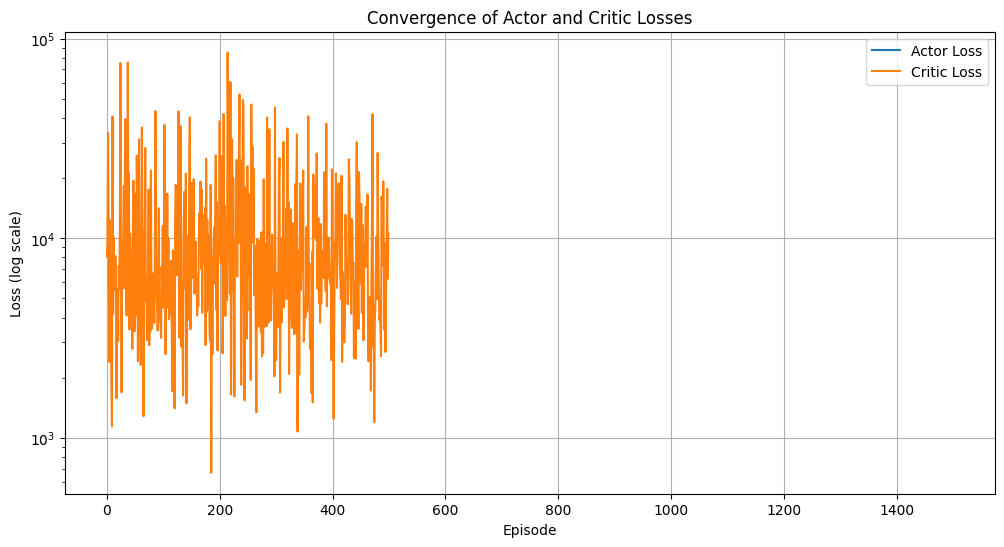

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def plot_convergence(actor_losses, critic_losses):
    """
    Plot the convergence of Actor and Critic losses over episodes with log scale.
    """
    actor_losses = np.array(actor_losses).reshape(-1)
    critic_losses = np.array(critic_losses).reshape(-1)

    plt.figure(figsize=(12, 6))
    plt.plot(actor_losses, label='Actor Loss')
    plt.plot(critic_losses, label='Critic Loss')
    plt.yscale('log')  # Set y-axis to log scale
    plt.xlabel('Episode')
    plt.ylabel('Loss (log scale)')
    plt.title('Convergence of Actor and Critic Losses')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to plot
plot_convergence(actor_losses, critic_losses)


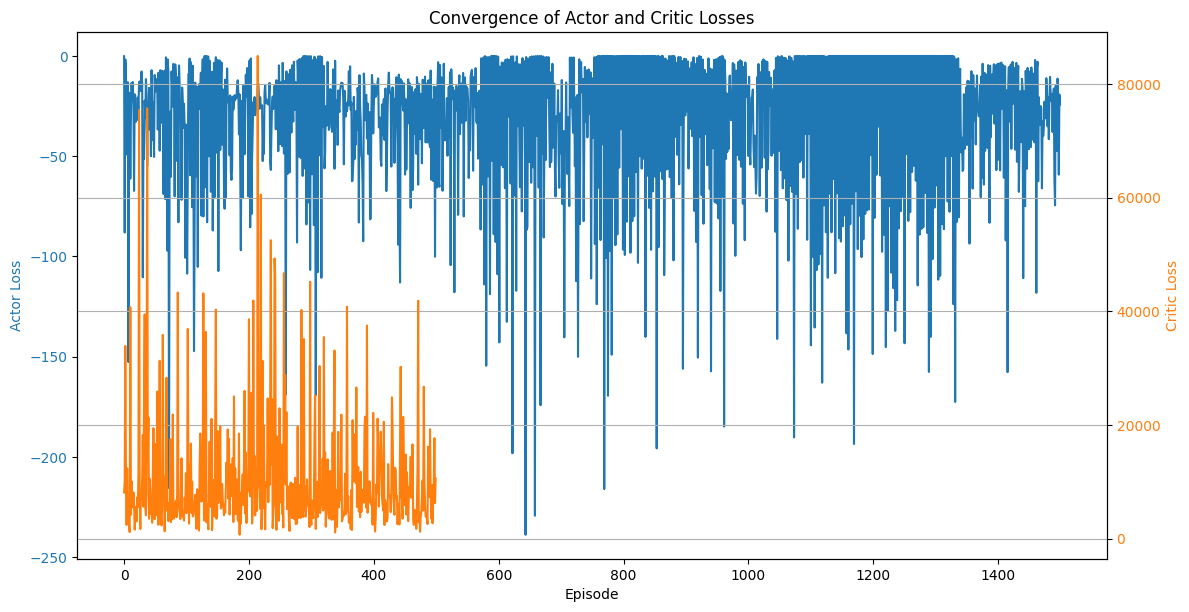

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def plot_convergence(actor_losses, critic_losses):
    """
    Plot the convergence of Actor and Critic losses over episodes using two y-axes.
    """
    actor_losses = np.array(actor_losses).reshape(-1)
    critic_losses = np.array(critic_losses).reshape(-1)

    fig, ax1 = plt.subplots(figsize=(12, 6))

    color = 'tab:blue'
    ax1.set_xlabel('Episode')
    ax1.set_ylabel('Actor Loss', color=color)
    ax1.plot(actor_losses, color=color, label='Actor Loss')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
    color = 'tab:orange'
    ax2.set_ylabel('Critic Loss', color=color)  # We already handled the x-label with ax1
    ax2.plot(critic_losses, color=color, label='Critic Loss')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # Ensure everything fits without overlap
    plt.title('Convergence of Actor and Critic Losses')
    plt.grid(True)
    plt.show()

# Call the function to plot
plot_convergence(actor_losses, critic_losses)


### Plot the learned policy - by showing the action probabilities across different state values (1 M)

In [ ]:
class YourEnvironment:
    def __init__(self, target_temp=22):
        self.state = np.zeros(22)  # Adjust state vector to have 22 features
        self.done = False
        self.action_space = 3  # Example: 0=Decrease, 1=Maintain, 2=Increase
        self.target_temp = target_temp  # Define target_temp attribute

    def reset(self):
        self.state = np.zeros(22)  # Reset state to initial values
        self.done = False
        return self.state

    def step(self, action):
        temp_adjustment = [-1, 0, 1]  # Decrease, Maintain, Increase
        next_state = self.state.copy()
        next_state[:9] += temp_adjustment[action]  # Apply action to temperature features

        # Simulate energy consumption (replace with actual model prediction)
        y_next = np.random.random()  # Placeholder for energy model prediction
        y_current = np.random.random()  # Placeholder for current energy consumption

        # Calculate reward based on current and next state
        reward = self.calculate_reward(self.state, next_state, y_current, y_next)

        self.state = next_state
        self.done = np.random.rand() > 0.95  # Randomly set done for this example

        return next_state, reward, self.done, {}

    def render(self):
        # Optional: Display or print the current state (for visualization/debugging)
        print(f"Current State: {self.state}")

    def calculate_reward(self, state, next_state, y_current, y_next):
        # Define how the reward is calculated based on the state changes and energy consumption
        temp_diff = np.abs(next_state[:9] - self.target_temp).mean()
        energy_saving = y_current - y_next
        reward = -temp_diff + energy_saving  # Example reward calculation
        return reward


In [ ]:
def plot_learned_policy(actor_model, env):
    state = env.reset()
    done = False

    while not done:
        state_input = np.array(state).reshape(1, -1)
        action_probs = actor_model(state_input)
        action = np.argmax(action_probs)

        next_state, reward, done, _ = env.step(action)
        env.render()

        state = next_state

# Initialize your environment
env = YourEnvironment(target_temp=89)  # Replace with your actual environment initialization

# # Train your actor-critic model
# actor_losses, critic_losses = train_actor_critic(
#     actor_model, critic_model, energy_model, X_train,
#     episodes=500, gamma=0.99
# )

# After training, call the plot_learned_policy to visualize the policy learned by the actor
plot_learned_policy(actor_model, env)


Current State: [-1. -1. -1. -1. -1. -1. -1. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.]
Current State: [-1. -1. -1. -1. -1. -1. -1. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.]
Current State: [-1. -1. -1. -1. -1. -1. -1. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.]
Current State: [-1. -1. -1. -1. -1. -1. -1. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.]
Current State: [-1. -1. -1. -1. -1. -1. -1. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.]
Current State: [-1. -1. -1. -1. -1. -1. -1. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.]
Current State: [-1. -1. -1. -1. -1. -1. -1. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.]
Current State: [-1. -1. -1. -1. -1. -1. -1. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.]
Current State: [-1. -1. -1. -1. -1. -1. -1. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.]
Current State: [-1. -1. -1. -1. -1. -1. -1. -1

#### Conclusion (0.5 M)

In [ ]:
# Baseline average energy consumption
import numpy as np
baseline_energy = np.mean(y_test)
print(f"Baseline Average Energy Consumption: {baseline_energy:.2f} Wh")


Baseline Average Energy Consumption: 99.34 Wh


In [ ]:
def calculate_energy_with_rl(actor_model, energy_model, X_test):
    """
    Calculate the average energy consumption on the test set with RL adjustments.

    Parameters:
    - actor_model: Trained Actor model
    - energy_model: Trained energy prediction model
    - X_test: Testing state features (numpy array)

    Returns:
    - avg_energy_rl: Average energy consumption with RL (float)
    """
    total_energy = 0

    for state in X_test:
        # Get action probabilities from the Actor
        action_probs = actor_model.predict(state.reshape(1, -1), verbose=0)
        action = np.random.choice(action_space, p=action_probs.flatten())  # Sample action based on probabilities

        # Simulate environment: get next_state, y_next, and reward
        next_state, y_next, _ = simulate_environment(state, action, energy_model)

        # Accumulate energy consumption
        total_energy += y_next

    avg_energy_rl = total_energy / len(X_test)
    return avg_energy_rl

# Calculate average energy with RL
avg_energy_rl = calculate_energy_with_rl(actor_model, energy_model, X_test)
print(f"Average Energy Consumption with RL: {avg_energy_rl:.2f} Wh")


Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

In [ ]:
# Baseline average energy consumption
baseline_energy = np.mean(y_test)
print(f"Baseline Average Energy Consumption: {baseline_energy:.2f} Wh")

# Average energy consumption with RL
avg_energy_rl = calculate_energy_with_rl(actor_model, energy_model, X_test)
print(f"Average Energy Consumption with RL: {avg_energy_rl:.2f} Wh")

# Calculate energy savings
energy_saving = baseline_energy - avg_energy_rl
print(f"Average Energy Savings per Sample: {energy_saving:.2f} Wh")


Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

By addressing the scaling issues, correctly handling energy consumption, and ensuring that actions influence energy usage through a trained energy prediction model, your Actor-Critic reinforcement learning algorithm should effectively learn to adjust temperature settings to optimize energy consumption while maintaining comfort.

Key Takeaways:
Separate Scaling: Always ensure that features directly involved in reward calculations are not improperly scaled, as this can distort the reward signal and hinder learning.

Environment Simulation: Actions must have a meaningful impact on the environment. By using a trained energy prediction model, you allow the RL agent's actions to influence energy consumption, enabling effective learning.

Reward Function Design: Carefully design the reward function to balance multiple objectives (e.g., comfort and energy efficiency) by appropriately weighting different components.

Model Training and Evaluation: Continuously monitor and evaluate your models to ensure convergence and effectiveness. Use visualizations to understand learning dynamics and policy behavior.

Iterative Refinement: RL algorithms often require iterative tuning of hyperparameters, reward functions, and environment simulations to achieve optimal performance.

